# IBM Quantum Computing Workshop (20 May 2020)

In [1]:
%matplotlib inline

# Importing standard Qiskit libraries and configuration account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

# Loading IBM Q account
provider = IBMQ.load_account()
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

# Example : Open Pulse

In [2]:
from qiskit.pulse import Schedule, SamplePulse, ConstantPulse
from qiskit.pulse.pulse_lib import GaussianSquare

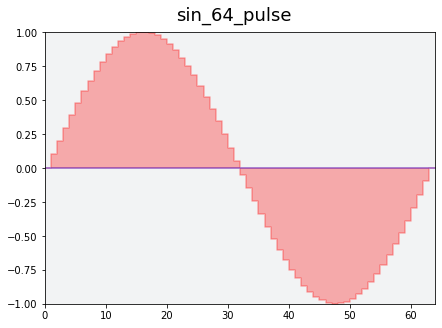

In [3]:
import numpy as np

# Import numpy to generate the Sine with 64 sample values
x = np.linspace(0, 2*np.pi, 64)
data = np.sin(x)

# Generate the SamplePulse to be scheduled
sample_pulse = SamplePulse(data, name="sin_64_pulse")
sample_pulse.draw()

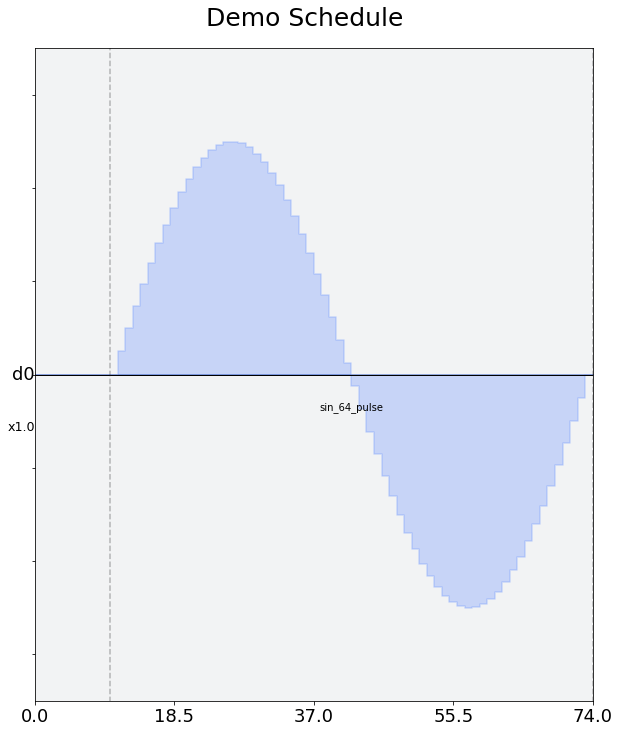

In [4]:
from qiskit.pulse import Play, DriveChannel

sched = Schedule(name="Demo Schedule")

qubit_idx = 0
# Starts from position, can change to start from cycle 10
sched = sched.insert(10, Play(sample_pulse, DriveChannel(qubit_idx)))
sched.draw(label=True)

In [5]:
backend = provider.get_backend(open_pulse=True)
backend

<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
from qiskit.scheduler.utils import measure_all

sched = sched.insert(sched.duration, measure_all(backend))

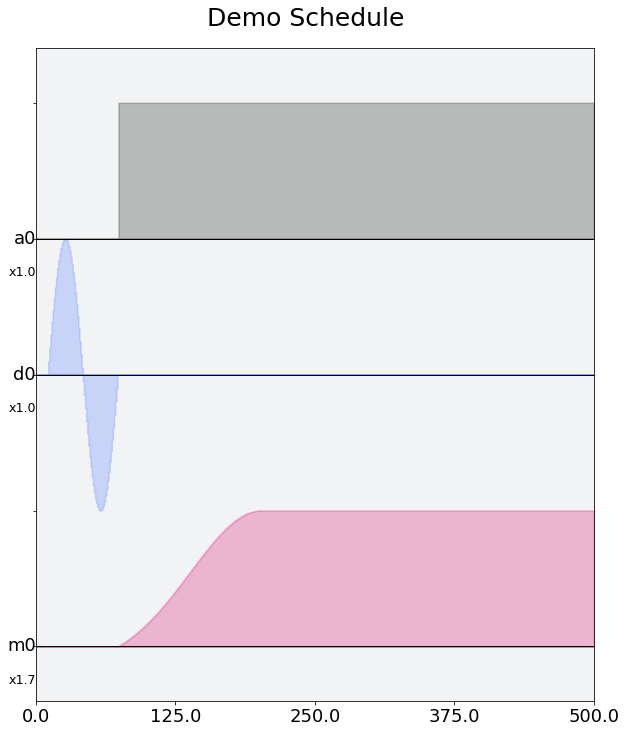

In [7]:
sched.draw(plot_range=[0, 500])

In [8]:
job = execute(sched, backend)
print(job)

IBMQJob(_api=<qiskit.providers.ibmq.api.clients.account.AccountClient object at 0x7f670761f9e8>, _api_status='CREATED', _backend=<IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, _backend_info={'id': '5db85d4c079e5f1b2117b303', 'name': 'ibmq_armonk'}, _cancelled=False, _creation_date=datetime.datetime(2020, 5, 20, 7, 16, 14, 209000, tzinfo=tzutc()), _error=None, _job_error_msg=None, _job_id='5ec4d93e97dd450014f6ef50', _kind=<ApiJobKind.QOBJECT_STORAGE: 'q-object-external-storage'>, _name=None, _qobj=PulseQobj(qobj_id='7f881e58-b210-46f6-9cb8-24c3f2d635b0', config=PulseQobjConfig(max_credits=10, meas_level=2, meas_lo_freq=[6.993427855], meas_return='avg', memory=False, memory_slot_size=100, memory_slots=1, parametric_pulses=[], pulse_library=[PulseLibraryItem(2f613389417215751c42c82118155cdf2abc51325c3c997a5c836d970b0ddd64, array([ 0.00000000e+00+0.j,  9.95678466e-02+0.j,  1.98146143e-01+0.j,
        2.94755174e-01+0.j,  3.88434796e-01+0.j,  4.78253979e-

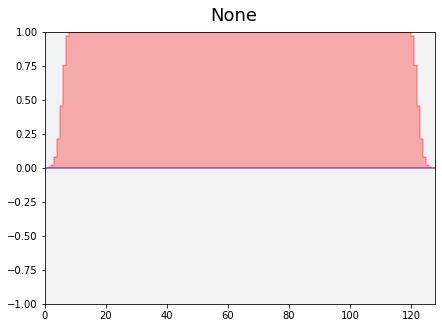

In [9]:
# Gaussian Square format : duration, amplitude, sigma, width, name
gaussian_square_pulse = GaussianSquare(128, 1, 2, 112, "gaussian_square")
gaussian_square_pulse.draw()

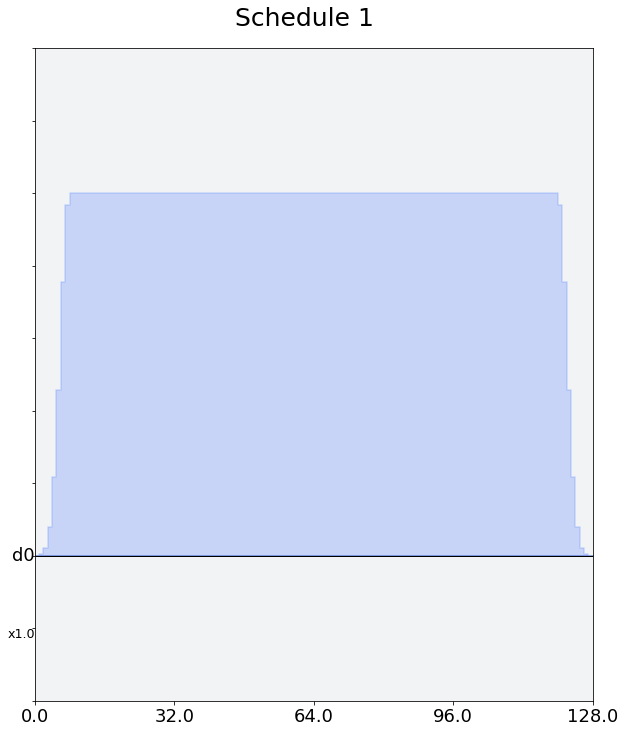

In [10]:
# Create the first schedule with the Gaussian Square pulse
schedule1 = Schedule(name='Schedule 1')
schedule1 = schedule1.insert(0, Play(gaussian_square_pulse, DriveChannel(0)))
schedule1.draw()

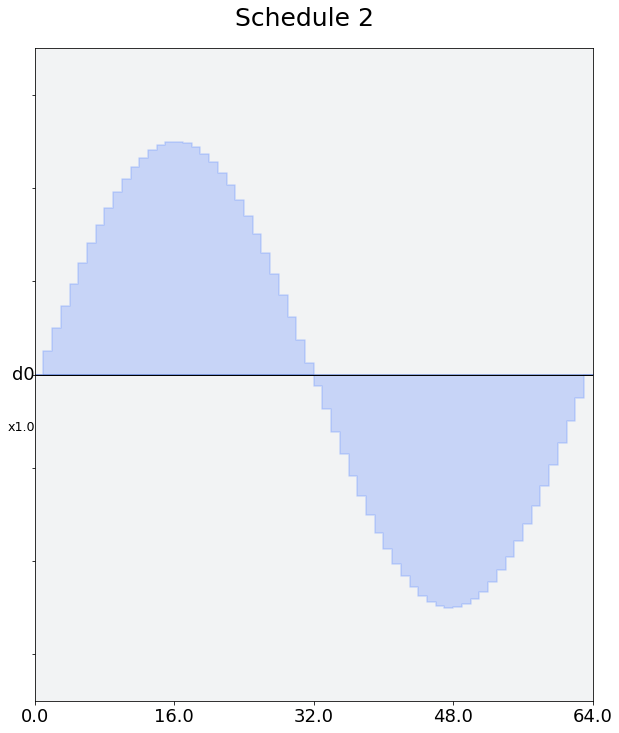

In [11]:
# Create the second schedule with the Sine pulse
schedule2 = Schedule(name='Schedule 2')
schedule2 = schedule2.insert(0, Play(sample_pulse, DriveChannel(0)))
schedule2.draw()

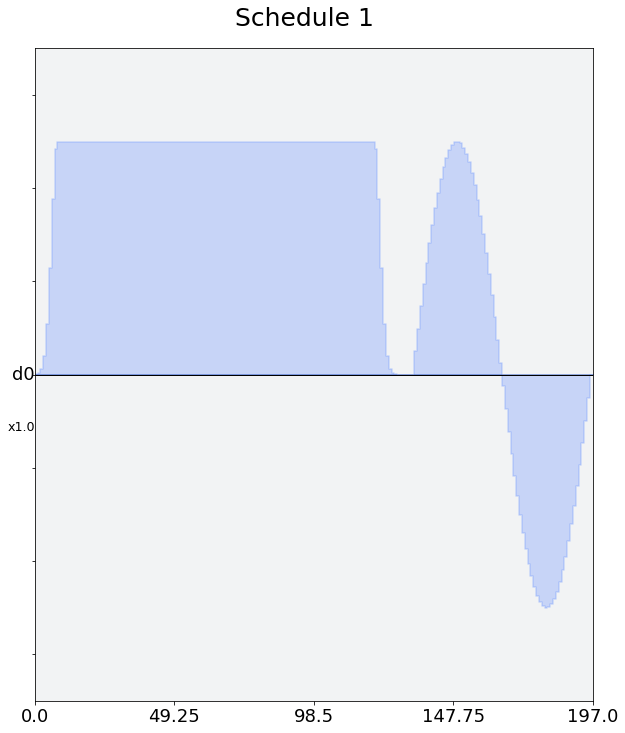

In [12]:
# Create the third schedule for the Sine pulse with duration cycles after the Gaussian Square pulse
schedule3 = schedule1.insert(schedule1.duration+5, schedule2)
schedule3.draw()

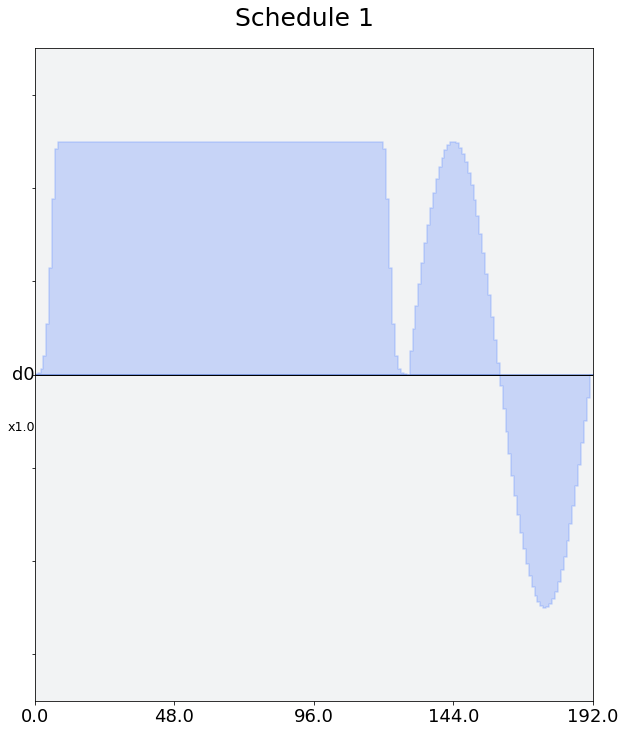

In [13]:
# Alternative appending schedule 2 immediately after schedule 1
schedule3_append = schedule1.append(schedule2)
schedule3_append.draw()

In [14]:
qc = QuantumCircuit(1, 1)
qc.h(0)
#qc.z(0)
qc.measure(0,0)

# Draw the circuit
qc.draw()

┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
c_0: ══════╩═

In [15]:
from qiskit import transpile, schedule

backend = provider.get_backend('ibmq_armonk')

# Transpile the circuit using the calibrations from the backend
transpiled_qc = transpile(qc, backend)

# Draw the transpiled circuit
transpiled_qc.draw()

# Observe (pi, pi) for U2 with the addition of qc.z(0) above instead of (0, pi)

┌──────────┐┌─┐
q_0: ┤ U2(0,pi) ├┤M├
     └──────────┘└╥┘
c_0: ═════════════╩═

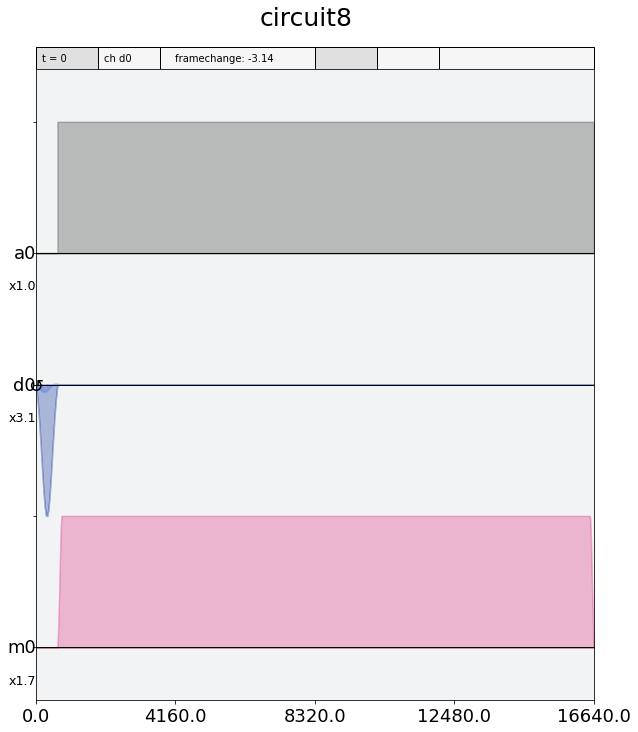

In [16]:
# Create the circuit schedule for the transpiled circuit
circuit_schedule = schedule(transpiled_qc, backend)

# Draw the circuit schedule and observe the framechange of -pi, -3.14
circuit_schedule.draw() # plot_range=[0, 500]

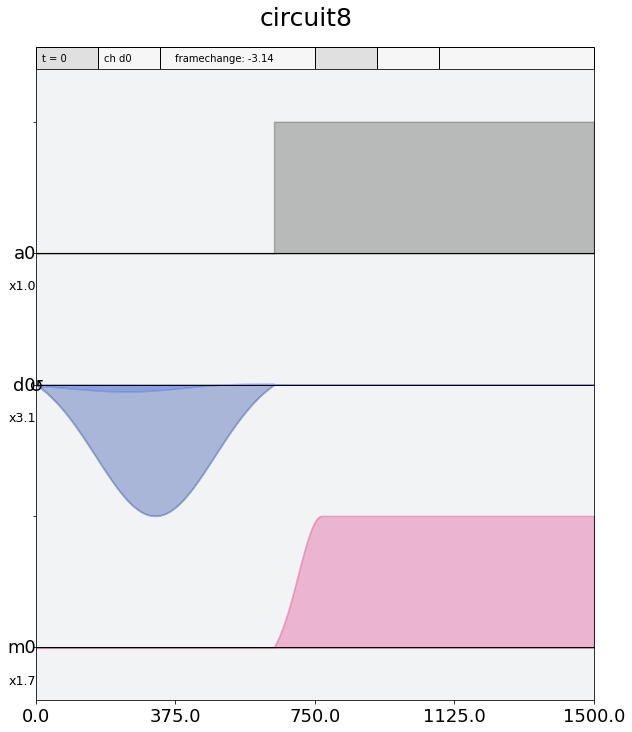

In [17]:
circuit_schedule.draw(plot_range=[0, 1500])

In [18]:
# 2 qubits circuit
qc2 = QuantumCircuit(2, 2)
qc2.h(0)
qc2.cx(0,1)
qc2.measure([0, 1], [0, 1])

# Draw the circuit
qc2.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

In [19]:
# Import the mockup backend to simulate more than 1 qubit
from qiskit.test.mock import FakeAlmaden

backend = FakeAlmaden()

# Transpile the circuit using the test backend calibration
transpiled_qc2 = transpile(qc2, backend)

# Draw the transpiled circuit
transpiled_qc2.draw()

┌──────────┐     ┌─┐   
        q_0 -> 0 ┤ U2(0,pi) ├──■──┤M├───
                 └──────────┘┌─┴─┐└╥┘┌─┐
        q_1 -> 1 ────────────┤ X ├─╫─┤M├
                             └───┘ ║ └╥┘
  ancilla_0 -> 2 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_1 -> 3 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_2 -> 4 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_3 -> 5 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_4 -> 6 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_5 -> 7 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_6 -> 8 ──────────────────╫──╫─
                                   ║  ║ 
  ancilla_7 -> 9 ──────────────────╫──╫─
                                   ║  ║ 
 ancilla_8 -> 10 ──────────────────╫──╫─
                                   ║  ║ 
 ancilla_9 -> 11 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_10 -> 12 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_11 -> 13 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_12 -> 14 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_13 -> 15 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_14 -> 16 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_15 -> 17 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_16 -> 18 ──────────────────╫──╫─
                                   ║  ║ 
ancilla_17 -> 19 ──────────────────╫──╫─
                                   ║  ║ 
            c_0: ══════════════════╩══╬═
                                      ║ 
            c_1: ═════════════════════╩═

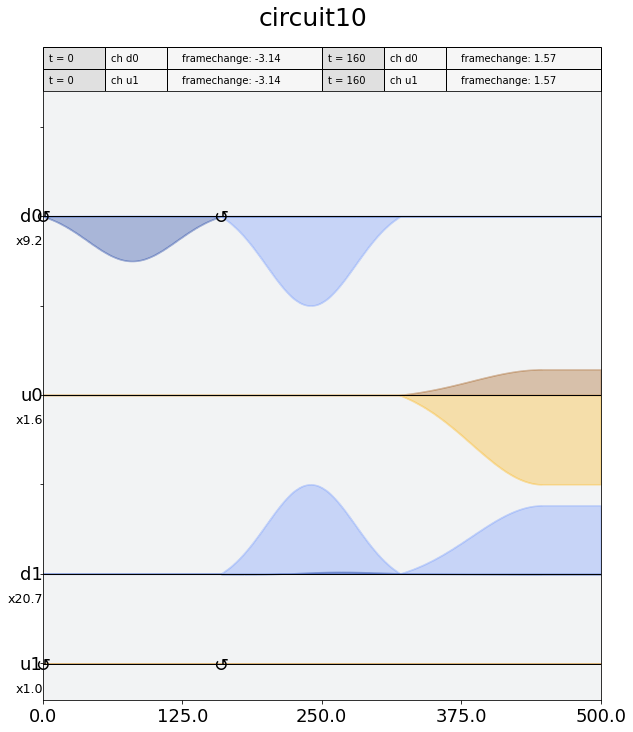

In [20]:
# Create the circuit schedule for the transpiled circuit
circuit_schedule2 = schedule(transpiled_qc2, backend)

# Draw the schedule of the 2-qubits circuit
circuit_schedule2.draw(plot_range=[0, 500]) # 2000

# End of Program